## Application

(403, 669, 3)
<class 'numpy.ndarray'>


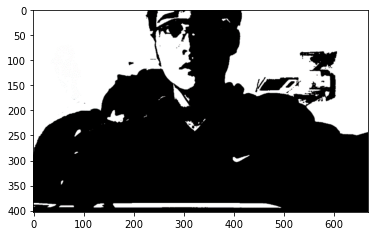

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

filePath = "ref_01.png"

stream = open( filePath.encode("utf-8") , "rb")
bytes = bytearray(stream.read())
numpyArray = np.asarray(bytes, dtype=np.uint8)

landmark_1 = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

landmark_1 = cv2.cvtColor(landmark_1, cv2.COLOR_BGR2RGB)
landmark_1 = landmark_1.astype(np.float32) / 255.

print(landmark_1.shape)
print(type(landmark_1))

plt.imshow(landmark_1)
plt.show()

#### Conv_1

In [2]:
landmark_1 = tf.image.resize(landmark_1, [540, 960])
landmark_1 = np.asarray(landmark_1)

conv2d.shape (1, 540, 960, 6)


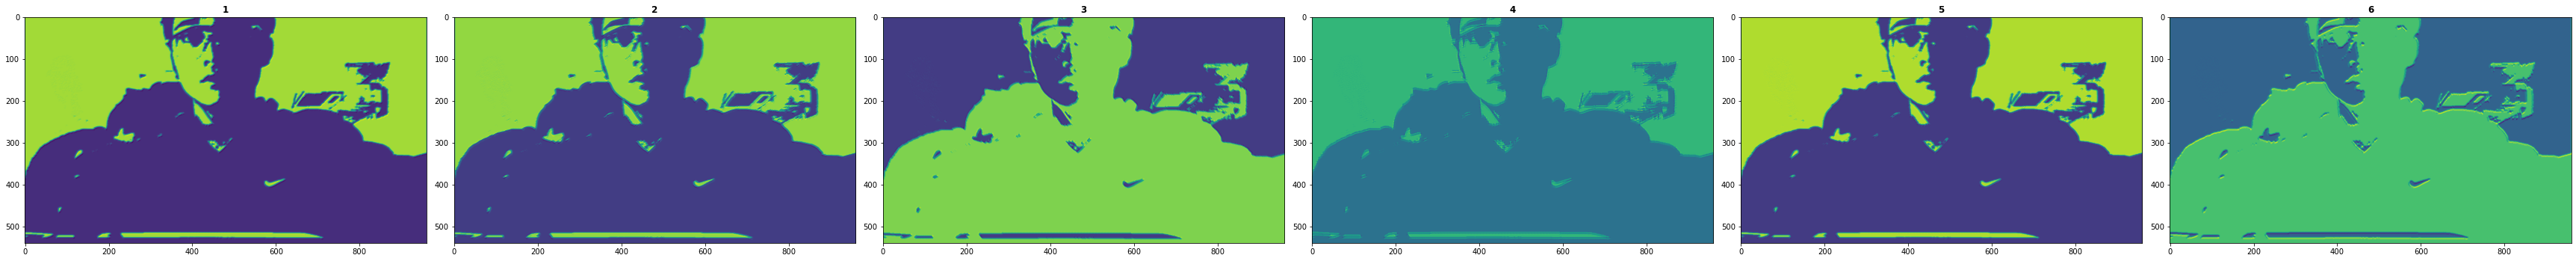

In [3]:
landmark_1 = landmark_1.reshape(1,540,960,3)
landmark_1 = tf.convert_to_tensor(landmark_1)

weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                             kernel_initializer=weight_init)(landmark_1)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)

## Plot 1
fig, axes = plt.subplots(1, len(feature_maps), 
                         figsize=(48, 54),
                         tight_layout=True)

for i, feature_map in enumerate(feature_maps):
    axes[i].imshow(feature_map.reshape(540,960))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## Plot 2
#for i, feature_map in enumerate(feature_maps):
#    #print(feature_map.reshape(540,960))
#    plt.subplot(1,len(feature_maps),i+1), plt.imshow(feature_map.reshape(540,960))
#plt.show()

#### Pooling_1

############## MaxPooling ##############
conv2d.shape (1, 540, 960, 6)
pool1.shape (1, 270, 480, 6)


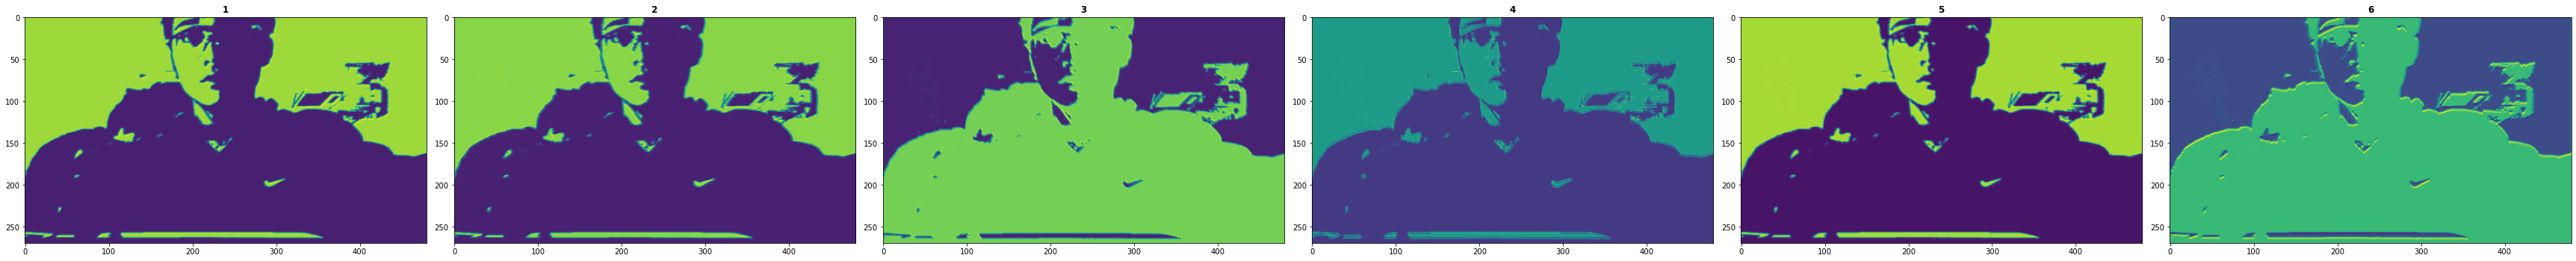

############## AveragePooling ##############
conv2d.shape (1, 540, 960, 6)
pool2.shape (1, 270, 480, 6)


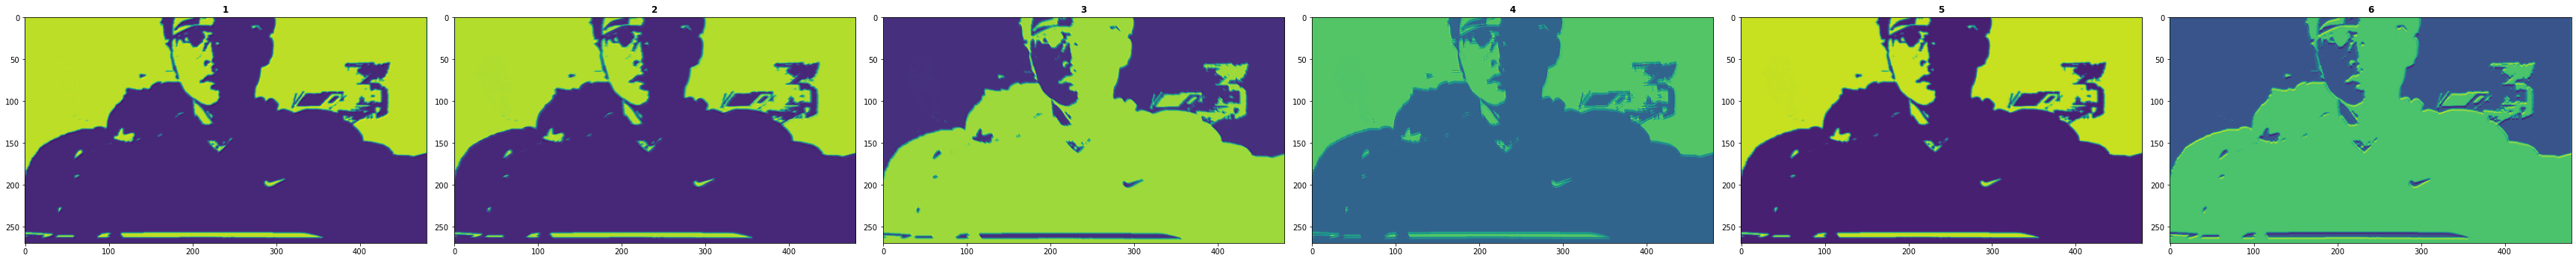

############## Max : Average = 3 : 2 ##############


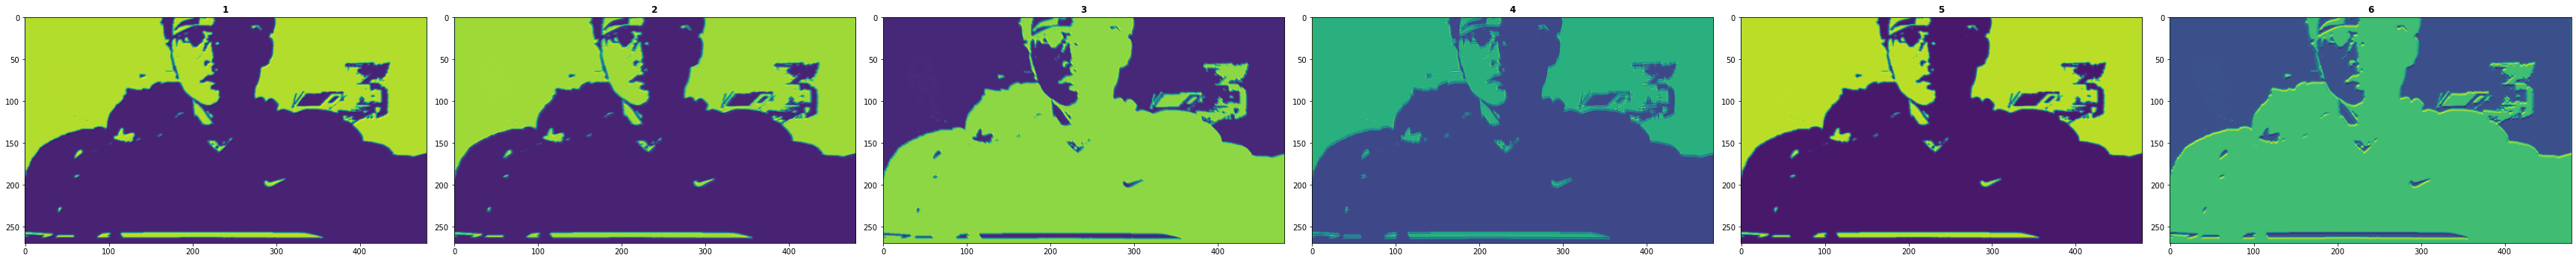

In [4]:
# 1. MaxPolling
print("############## MaxPooling ##############")

print("conv2d.shape", conv2d.shape)

pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print("pool1.shape", pool1.shape)
pool_imgs1 = np.swapaxes(pool1, 0, 3)


## Plot 1
fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs1):
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## Plot 2
#for i, pool_img in enumerate(pool_imgs1):
#    #print(pool_img.reshape(540,960))
#    plt.subplot(1,len(pool_imgs1),i+1), plt.imshow(pool_img.reshape(270,480))
#plt.show()


# 2. AveragePolling
print("############## AveragePooling ##############")

print("conv2d.shape", conv2d.shape)

pool2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print("pool2.shape", pool2.shape)
pool_imgs2 = np.swapaxes(pool2, 0, 3)


## Plot 1
fig, axes = plt.subplots(1, len(pool_imgs2), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs2):
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()


# 3. Max : Average = 3 : 2
print("############## Max : Average = 3 : 2 ##############")

fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)

for i in range(len(pool_imgs1)):
    pool_img = (pool_imgs1[i]*3 + pool_imgs2[i]*2)/5
    #print(pool_img.reshape(270,480))
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

pool3 = (pool1 + pool2)/2

#### Pool Layer Loop

In [5]:
num = 2

"""
for i in range(num):
    print("\n Pooling : ", i+1, "\n")
    weight_init = keras.initializers.RandomNormal(stddev=0.01)

    conv2d_1 = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                                 kernel_initializer=weight_init)(pool1)
    print("conv2d_1.shape", conv2d_1.shape)

    conv2d_2 = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                                 kernel_initializer=weight_init)(pool2)
    print("conv2d_2.shape", conv2d_2.shape)

    conv2d_3 = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                                 kernel_initializer=weight_init)(pool3)
    print("conv2d_3.shape", conv2d_3.shape)

    pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d_1)
    print("pool1.shape", pool1.shape)

    pool2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d_2)
    print("pool2.shape", pool2.shape)

    pool3_1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d_3)
    pool3_2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d_3)    
    pool3 = (pool3_1 + pool3_2)/2
    print("pool3.shape", pool3.shape)
    
"""
for i in range(num):
    print("\n Pooling : ", i, "\n")
    
    pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(pool1)
    print("pool1.shape", pool1.shape)

    pool2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(pool2)
    print("pool2.shape", pool2.shape)

    pool3_1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(pool3)
    pool3_2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(pool3)    
    pool3 = (pool3_1 + pool3_2)/2
    print("pool3.shape", pool3.shape)



 Pooling :  0 

pool1.shape (1, 135, 240, 6)
pool2.shape (1, 135, 240, 6)
pool3.shape (1, 135, 240, 6)

 Pooling :  1 

pool1.shape (1, 68, 120, 6)
pool2.shape (1, 68, 120, 6)
pool3.shape (1, 68, 120, 6)


############## MaxPooling ##############
pool1.shape (1, 68, 120, 6)


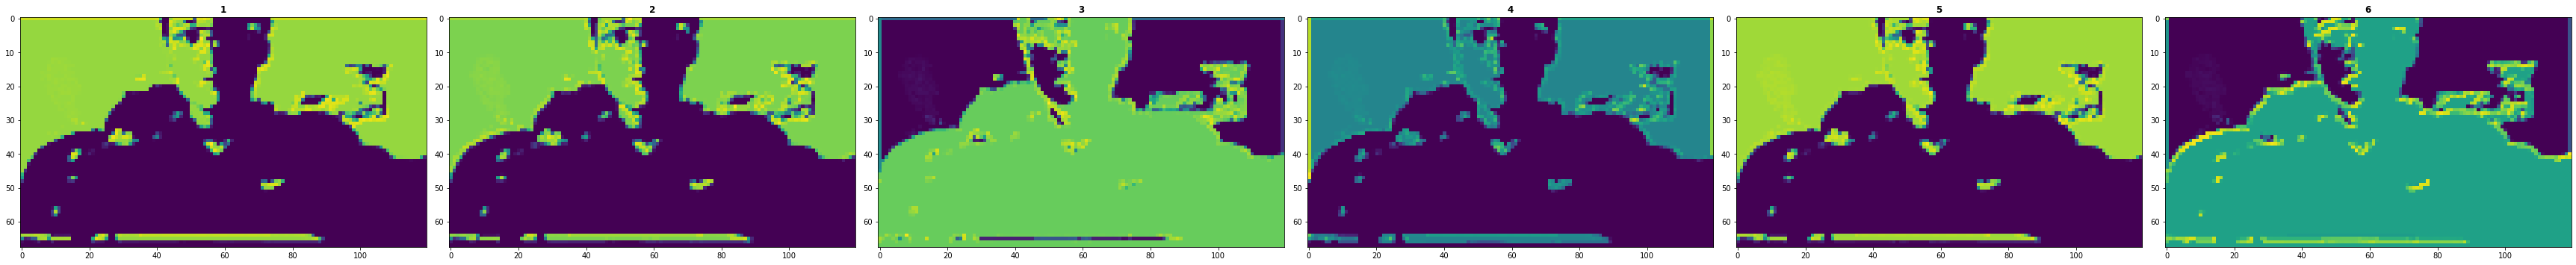

############## AveragePooling ##############
pool2.shape (1, 68, 120, 6)


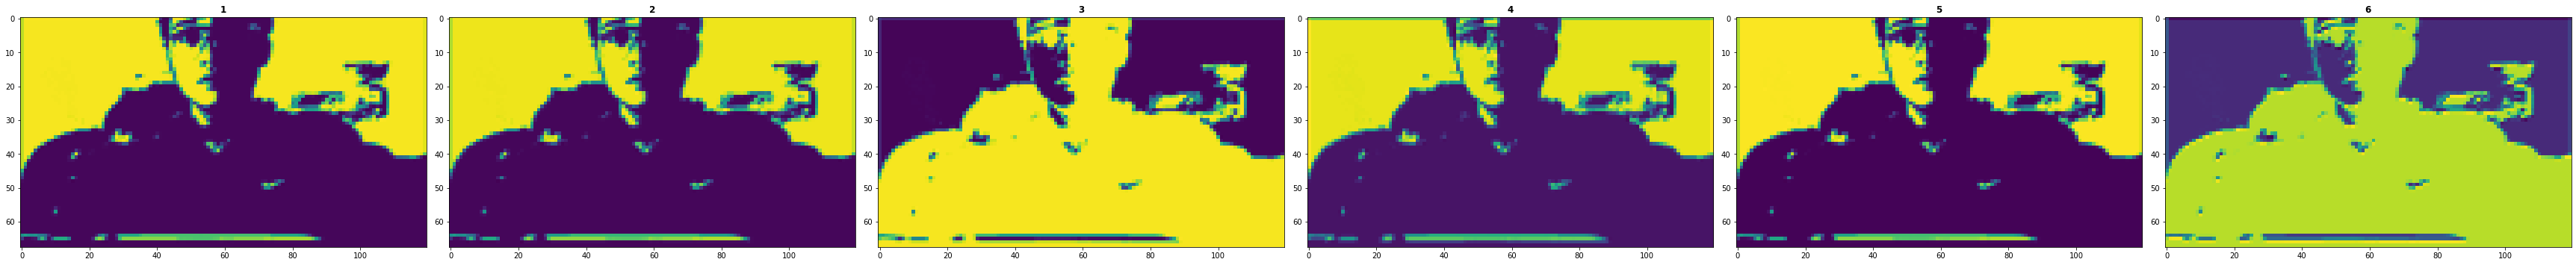

############## Max : Average = 1 : 1 ##############
pool2.shape (1, 68, 120, 6)


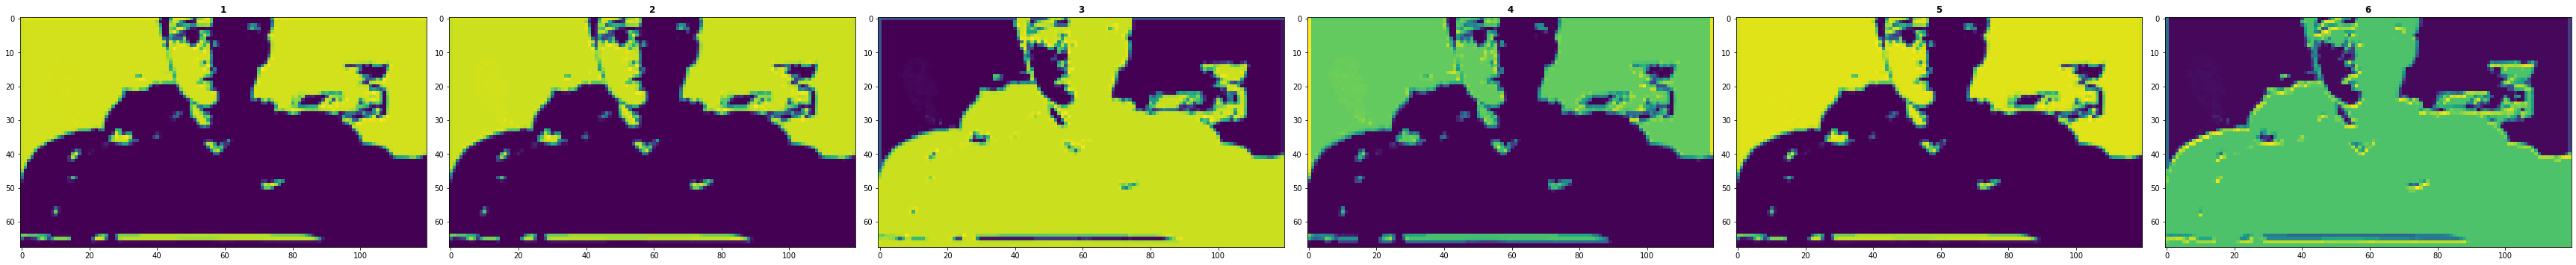

In [6]:
h = pool3.shape[1]
w = pool3.shape[2]

# 1. MaxPolling
print("############## MaxPooling ##############")

print("pool1.shape", pool1.shape)
pool_imgs1 = np.swapaxes(pool1, 0, 3)

fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs1):
    axes[i].imshow(pool_img.reshape(h,w))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

# 2. AveragePolling
print("############## AveragePooling ##############")

print("pool2.shape", pool2.shape)
pool_imgs2 = np.swapaxes(pool2, 0, 3)

fig, axes = plt.subplots(1, len(pool_imgs2), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs2):
    axes[i].imshow(pool_img.reshape(h,w))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()


# 3. Max : Average = 3 : 2
print("############## Max : Average = 1 : 1 ##############")

print("pool2.shape", pool2.shape)
pool_imgs3 = np.swapaxes(pool3, 0, 3)

fig, axes = plt.subplots(1, len(pool_imgs3), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs3):
    axes[i].imshow(pool_img.reshape(h,w))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

In [7]:
num = 3

"""
for i in range(num):
    print("\n Pooling : ", i+1, "\n")
    weight_init = keras.initializers.RandomNormal(stddev=0.01)

    conv2d_1 = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                                 kernel_initializer=weight_init)(pool1)
    print("conv2d_1.shape", conv2d_1.shape)

    conv2d_2 = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                                 kernel_initializer=weight_init)(pool2)
    print("conv2d_2.shape", conv2d_2.shape)

    conv2d_3 = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                                 kernel_initializer=weight_init)(pool3)
    print("conv2d_3.shape", conv2d_3.shape)

    pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d_1)
    print("pool1.shape", pool1.shape)

    pool2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d_2)
    print("pool2.shape", pool2.shape)

    pool3_1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d_3)
    pool3_2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d_3)    
    pool3 = (pool3_1 + pool3_2)/2
    print("pool3.shape", pool3.shape)
    
"""
for i in range(num):
    print("\n Pooling : ", i, "\n")
    
    pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(pool1)
    print("pool1.shape", pool1.shape)

    pool2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(pool2)
    print("pool2.shape", pool2.shape)

    pool3_1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(pool3)
    pool3_2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(pool3)    
    pool3 = (pool3_1 + pool3_2)/2
    print("pool3.shape", pool3.shape)



 Pooling :  0 

pool1.shape (1, 34, 60, 6)
pool2.shape (1, 34, 60, 6)
pool3.shape (1, 34, 60, 6)

 Pooling :  1 

pool1.shape (1, 17, 30, 6)
pool2.shape (1, 17, 30, 6)
pool3.shape (1, 17, 30, 6)

 Pooling :  2 

pool1.shape (1, 9, 15, 6)
pool2.shape (1, 9, 15, 6)
pool3.shape (1, 9, 15, 6)


############## MaxPooling ##############
pool1.shape (1, 9, 15, 6)


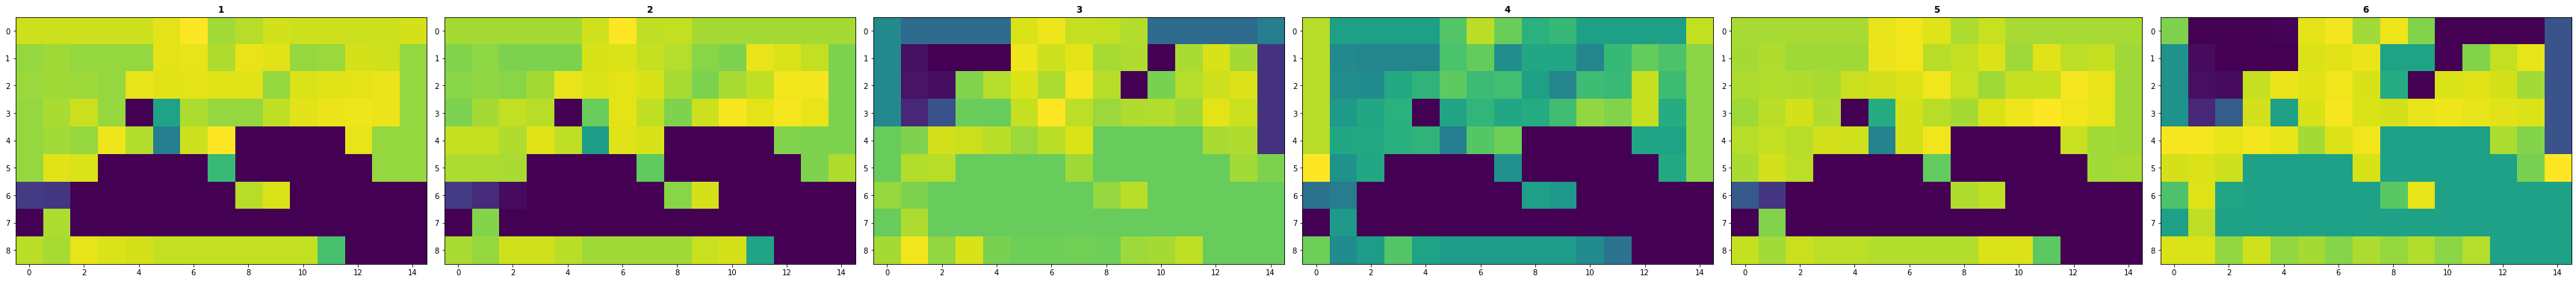

############## AveragePooling ##############
pool2.shape (1, 9, 15, 6)


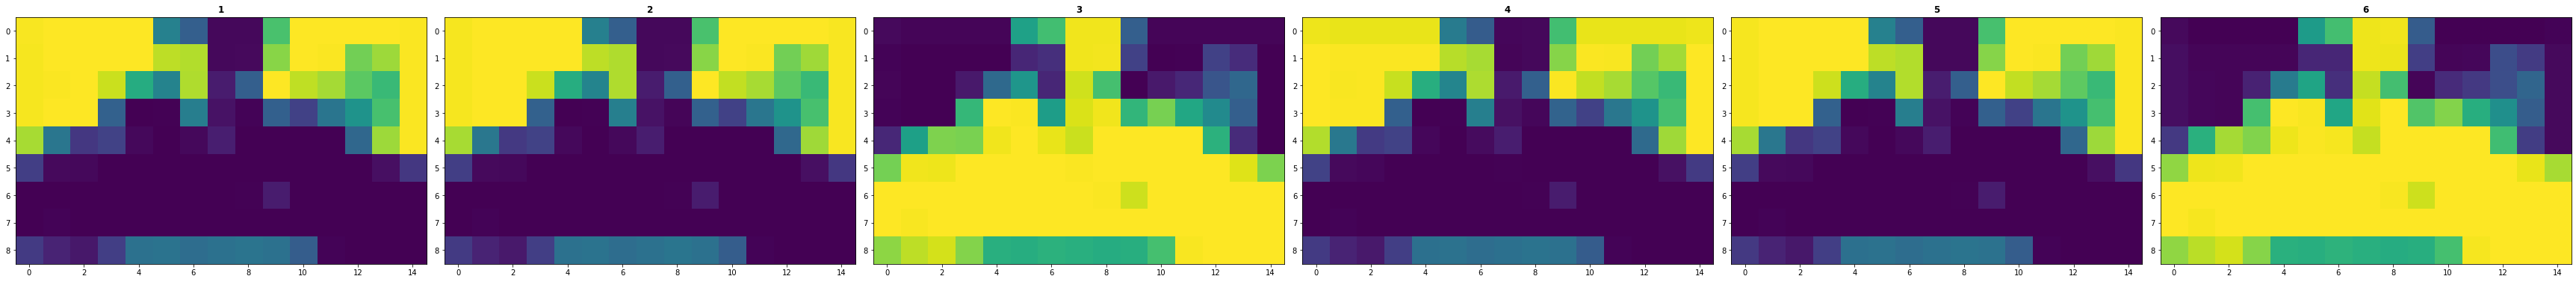

############## Max : Average = 1 : 1 ##############
pool2.shape (1, 9, 15, 6)


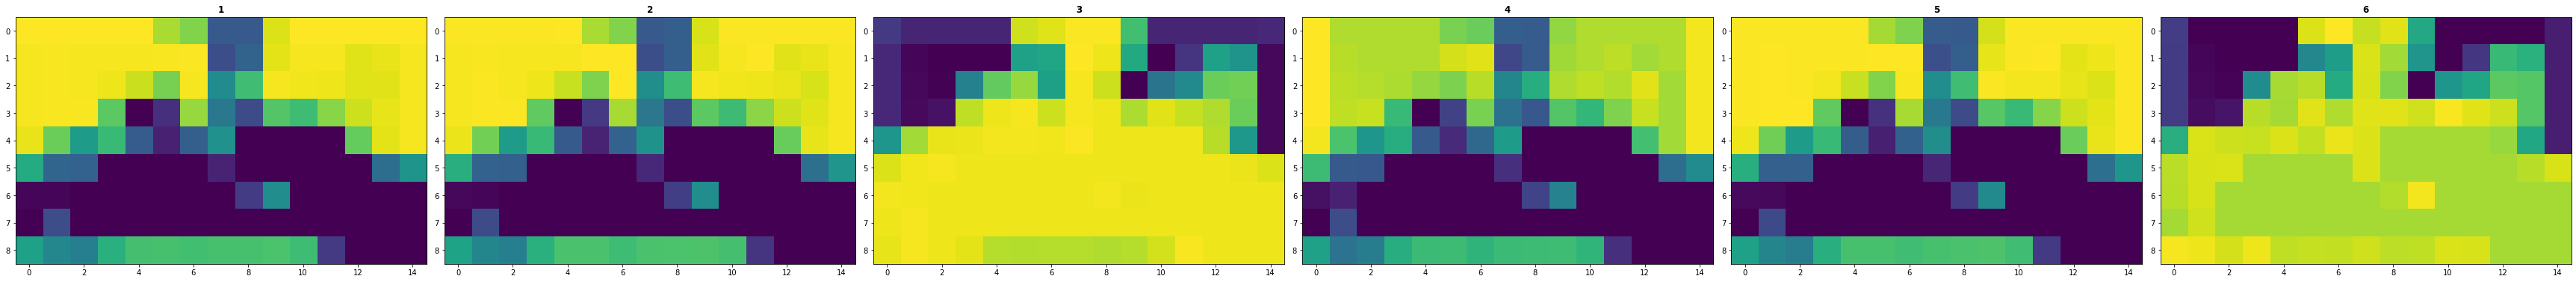

In [8]:
h = pool3.shape[1]
w = pool3.shape[2]

# 1. MaxPolling
print("############## MaxPooling ##############")

print("pool1.shape", pool1.shape)
pool_imgs1 = np.swapaxes(pool1, 0, 3)

fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs1):
    axes[i].imshow(pool_img.reshape(h,w))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

# 2. AveragePolling
print("############## AveragePooling ##############")

print("pool2.shape", pool2.shape)
pool_imgs2 = np.swapaxes(pool2, 0, 3)

fig, axes = plt.subplots(1, len(pool_imgs2), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs2):
    axes[i].imshow(pool_img.reshape(h,w))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()


# 3. Max : Average = 3 : 2
print("############## Max : Average = 1 : 1 ##############")

print("pool2.shape", pool2.shape)
pool_imgs3 = np.swapaxes(pool3, 0, 3)

fig, axes = plt.subplots(1, len(pool_imgs3), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs3):
    axes[i].imshow(pool_img.reshape(h,w))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()